### • DOMAIN: Semiconductor manufacturing process
1. ***CONTEXT***: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.


2. ***DATA DESCRIPTION***: signal-data.csv : (1567, 592)
   2.1 The data consists of 1567 datapoints each with 591 features.
   2.2 The dataset presented in this case represents a selection of such features where each example represents a          single production entity with associated measured features and the labels represent a simple pass/fail yield        for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the          data time stamp is for that specific test point.
3. ***PROJECT OBJECTIVE***: We will build a classifier to predict the Pass/Fail yield of a particular process entity and    analyse whether all the features are required to build the model or not.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

## 1.A. Import ‘signal-data.csv’ as DataFrame.

In [2]:
df = pd.read_csv('/Users/B0297340/Downloads/ANACONDA + AIML/FMT/FMT project/signal-data.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.shape

(1567, 592)

## 1.B. Print 5 point summary and share at least 2 observations

In [5]:
df.describe(include='all').round(2)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.00,1560.00,1553.00,1553.00,1553.00,1553.0,1553.00,1558.00,1565.00,...,618.00,1566.00,1566.00,1566.0,1566.00,1566.00,1566.00,1566.00,1566.00,1567.00
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.45,2495.85,2200.55,1396.38,4.20,100.0,101.11,0.12,1.46,...,97.93,0.50,0.02,0.0,3.07,0.02,0.02,0.01,99.67,-0.87
std,NaN,73.62,80.41,29.51,441.69,56.36,0.0,6.24,0.01,0.07,...,87.52,0.00,0.02,0.0,3.58,0.01,0.01,0.00,93.89,0.50
min,NaN,2743.24,2158.75,2060.66,0.00,0.68,100.0,82.13,0.00,1.19,...,0.00,0.48,0.01,0.0,1.20,-0.02,0.00,0.00,0.00,-1.00
25%,NaN,2966.26,2452.25,2181.04,1081.88,1.02,100.0,97.92,0.12,1.41,...,46.18,0.50,0.01,0.0,2.31,0.01,0.01,0.00,44.37,-1.00
50%,NaN,3011.49,2499.40,2201.07,1285.21,1.32,100.0,101.51,0.12,1.46,...,72.29,0.50,0.01,0.0,2.76,0.02,0.01,0.00,71.90,-1.00
75%,NaN,3056.65,2538.82,2218.06,1591.22,1.53,100.0,104.59,0.12,1.52,...,116.54,0.50,0.02,0.0,3.30,0.03,0.02,0.01,114.75,-1.00


### Observation :


1. Many data points are skewed in nature and outliers are present in dataset.
2. Null Values are present in Dataset which needs to be treated.



## 2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 

In [6]:
df_org = df.copy()

#### removing all the features with 20%+ Null values

In [7]:
col_to_be_deletead = []
def calculate_missing_bad_percentage(df):
    missing_bad_percentage = {}
    total_rows = df.shape[0]

    for column in df.columns[1:]:
        # Count the number of missing values (NaNs)
        num_missing = df[column].isna().sum()
                
        # Calculate the percentage
        percentage = (num_missing) / total_rows * 100
        missing_bad_percentage[column] = percentage
    
    return missing_bad_percentage

# Call the function
missing_bad_percentage = calculate_missing_bad_percentage(df)

# Display the percentage of missing or bad values for each column
for col, percentage in missing_bad_percentage.items():
    if(percentage>20):
        print(f"Column '{col}': {percentage:.2f}% missing or bad values")
        col_to_be_deletead.append(col)

        
print('\n number of columns to be deleted -> ' , len(col_to_be_deletead)) 
print('\n columns having null value greater than 20 % -> ' , col_to_be_deletead) 

print('\n Dataframe size before deleting the columns : ',df.shape)  

for col in df.columns:
    if col in col_to_be_deletead:
        df.drop(columns=col, inplace=True)
        
print('\n Dataframe size after deleting the columns : ', df.shape)        

Column '72': 50.67% missing or bad values
Column '73': 50.67% missing or bad values
Column '85': 85.58% missing or bad values
Column '109': 64.96% missing or bad values
Column '110': 64.96% missing or bad values
Column '111': 64.96% missing or bad values
Column '112': 45.63% missing or bad values
Column '157': 91.19% missing or bad values
Column '158': 91.19% missing or bad values
Column '220': 85.58% missing or bad values
Column '244': 64.96% missing or bad values
Column '245': 64.96% missing or bad values
Column '246': 64.96% missing or bad values
Column '247': 45.63% missing or bad values
Column '292': 91.19% missing or bad values
Column '293': 91.19% missing or bad values
Column '345': 50.67% missing or bad values
Column '346': 50.67% missing or bad values
Column '358': 85.58% missing or bad values
Column '382': 64.96% missing or bad values
Column '383': 64.96% missing or bad values
Column '384': 64.96% missing or bad values
Column '385': 45.63% missing or bad values
Column '492': 

#### imputing rest with mean of the feature

In [8]:
missing_columns = df.columns[df.isnull().any()]

means = df[missing_columns].mean()

df.fillna(means, inplace=True)

In [9]:
if df.isnull().any().any():
    print('Null value is present')

else:
    print('No Null Value is present')
   

No Null Value is present


## 2.B. Identify and drop the features which are having same value for all the rows.

In [10]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

print("Columns with constant values:", constant_columns ,'\n number of columns to be deleted : ' , len(constant_columns))

print("\n DataFrame size before dropping constant columns: " , df.shape)
# Step 2: Drop columns with constant values
df.drop(columns=constant_columns, inplace=True)

print("\n DataFrame size after dropping constant columns: " , df.shape)

Columns with constant values: ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'] 
 number of columns to be deleted :  116

 DataFrame size before dropping constant columns:  (1567, 560)

 DataFrame size after dropping constant columns:  (1567, 44

## 2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [11]:
df.describe(include='all').round(2)

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00,...,1567.00,1567.00,1567.00,1567.0,1567.00,1567.00,1567.00,1567.00,1567.00,1567.00
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.45,2495.85,2200.55,1396.38,4.20,101.11,0.12,1.46,-0.00,...,16.64,0.50,0.02,0.0,3.07,0.02,0.02,0.01,99.67,-0.87
std,NaN,73.48,80.23,29.38,439.71,56.10,6.21,0.01,0.07,0.02,...,12.49,0.00,0.02,0.0,3.58,0.01,0.01,0.00,93.86,0.50
min,NaN,2743.24,2158.75,2060.66,0.00,0.68,82.13,0.00,1.19,-0.05,...,4.58,0.48,0.01,0.0,1.20,-0.02,0.00,0.00,0.00,-1.00
25%,NaN,2966.66,2452.89,2181.10,1083.89,1.02,97.94,0.12,1.41,-0.01,...,11.50,0.50,0.01,0.0,2.31,0.01,0.01,0.00,44.37,-1.00
50%,NaN,3011.84,2498.91,2200.96,1287.35,1.32,101.49,0.12,1.46,-0.00,...,13.82,0.50,0.01,0.0,2.76,0.02,0.01,0.00,72.02,-1.00
75%,NaN,3056.54,2538.74,2218.06,1590.17,1.53,104.53,0.12,1.52,0.01,...,17.08,0.50,0.02,0.0,3.29,0.03,0.02,0.01,114.75,-1.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dtypes: float64(442), int64(1), object(1)
memory usage: 5.3+ MB


In [13]:
df.drop(columns='Time', inplace=True) 

### Note :
 #### Dropping 'Time' column because this is not useful data to determin pass/fail yield of a semiconductor.

## 2.D. Check for multi-collinearity in the data and take necessary action.

In [14]:
correlation_matrix = df.corr()

high_corr_features = (correlation_matrix > 0.9)


In [15]:
print('\n Dataframe size before deleting the columns : ',df.shape)  

correlation_matrix = df.corr().abs()

# Create a mask to identify highly correlated features
mask = (correlation_matrix > 0.9) & (correlation_matrix < 1.0)

# Initialize a set to hold the names of correlated columns to drop
cols_to_drop = set()

# Iterate through the columns and rows of the correlation matrix
for col in range(len(correlation_matrix.columns)):
    for row in range(col+1, len(correlation_matrix.columns)):
        if mask.iloc[row, col]:
            # If a pair of columns is highly correlated, add one to the set of columns to drop
            correlated_col = correlation_matrix.columns[row]
            cols_to_drop.add(correlated_col)

# Convert the set to a list (if needed) and drop the columns from the dataframe
cols_to_drop = list(cols_to_drop)
df.drop(cols_to_drop, axis=1, inplace=True)


print('\n Dropped Features :' , cols_to_drop , '\n No. of columns to drop :' , len(cols_to_drop) )        
print('\n Dataframe size after deleting the columns : ', df.shape) 


 Dataframe size before deleting the columns :  (1567, 443)

 Dropped Features : ['393', '36', '409', '290', '297', '273', '541', '471', '152', '456', '320', '336', '304', '341', '457', '467', '249', '282', '252', '411', '359', '287', '448', '354', '420', '494', '309', '288', '331', '298', '527', '285', '540', '333', '286', '54', '303', '317', '123', '272', '307', '339', '575', '387', '338', '556', '376', '204', '174', '447', '318', '199', '478', '545', '427', '294', '491', '300', '306', '342', '366', '429', '407', '470', '362', '539', '523', '127', '335', '104', '445', '340', '361', '363', '347', '435', '524', '391', '321', '425', '291', '469', '274', '70', '417', '426', '349', '207', '154', '453', '493', '334', '377', '522', '410', '348', '281', '436', '270', '440', '310', '574', '588', '355', '275', '105', '584', '455', '165', '437', '552', '406', '365', '416', '344', '569', '390', '283', '459', '148', '323', '576', '301', '434', '296', '332', '408', '568', '497', '577', '585', '343

## E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [16]:
df.head()

,0,1,2,3,4,6,7,8,9,10,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1


In [17]:
target_correlations = df.corr()['Pass/Fail'].abs().sort_values()

print(target_correlations)


132          0.000365
108          0.000705
2            0.000957
223          0.001068
472          0.001219
               ...   
431          0.120304
510          0.131587
103          0.151196
59           0.155771
Pass/Fail    1.000000
Name: Pass/Fail, Length: 248, dtype: float64


In [18]:
uncorrelated_features = target_correlations[target_correlations < 0.1].index.tolist()


print( 'Features to be deleted as they are not very correlated with target variable :',len(uncorrelated_features),uncorrelated_features)



Features to be deleted as they are not very correlated with target variable : 238 ['132', '108', '2', '223', '472', '113', '570', '71', '39', '156', '16', '41', '94', '212', '34', '1', '589', '15', '367', '184', '171', '177', '549', '586', '432', '139', '77', '119', '187', '162', '12', '583', '51', '496', '53', '74', '268', '250', '173', '168', '147', '92', '45', '412', '84', '548', '368', '18', '248', '55', '185', '482', '91', '46', '473', '17', '251', '228', '253', '136', '169', '487', '480', '217', '255', '150', '219', '35', '546', '61', '23', '116', '82', '7', '202', '564', '4', '419', '176', '224', '500', '474', '218', '267', '563', '107', '48', '142', '438', '6', '216', '117', '29', '131', '269', '24', '60', '215', '62', '489', '571', '161', '57', '225', '560', '439', '120', '43', '98', '254', '221', '153', '544', '555', '167', '151', '208', '118', '558', '44', '20', '81', '483', '559', '238', '83', '3', '86', '0', '486', '239', '155', '88', '135', '75', '8', '47', '476', '201', 

In [19]:
df.drop(uncorrelated_features, axis=1, inplace=True)

In [20]:
df.head()

,21,28,59,103,129,210,430,431,510,Pass/Fail
0,-5419.00,64.2333,-1.7264,-0.0042,-0.0473,0.0772,18.7673,33.1562,64.6707,-1
1,-5441.50,68.4222,0.8073,-0.0045,-0.0946,0.0566,10.4383,2.2655,141.4365,-1
2,-5447.75,67.1333,23.8245,-0.0026,-0.1892,0.0339,10.3162,29.1663,240.7767,1
3,-5468.25,62.9333,24.3791,-0.0059,0.2838,0.1248,15.7089,13.4051,113.5593,-1
4,-5476.25,62.8333,-12.2945,-0.0045,-0.5677,0.0915,12.7642,10.7390,148.0663,-1


In [21]:
df.shape

(1567, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   21         1567 non-null   float64
 1   28         1567 non-null   float64
 2   59         1567 non-null   float64
 3   103        1567 non-null   float64
 4   129        1567 non-null   float64
 5   210        1567 non-null   float64
 6   430        1567 non-null   float64
 7   431        1567 non-null   float64
 8   510        1567 non-null   float64
 9   Pass/Fail  1567 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 122.6 KB


## 3. A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

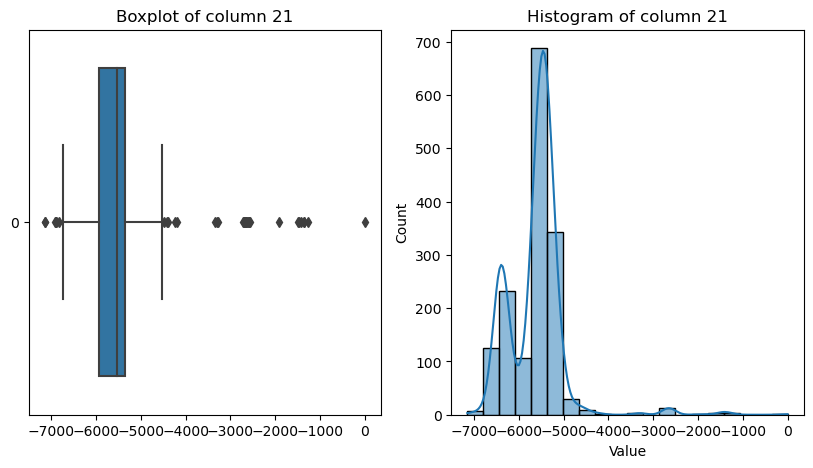

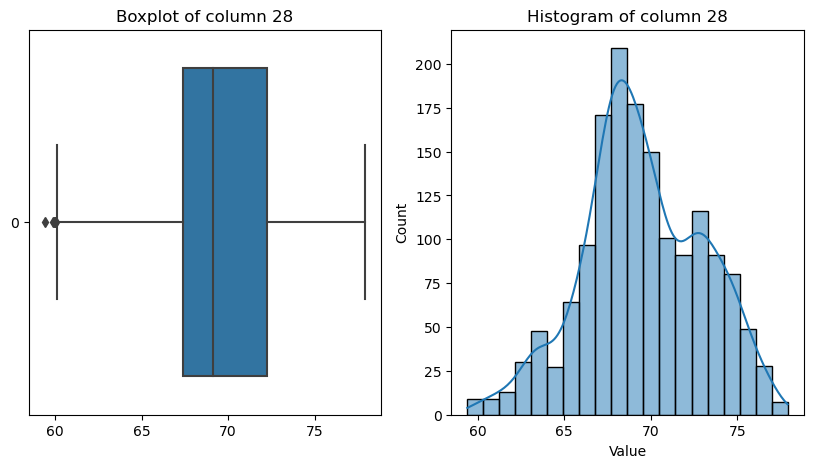

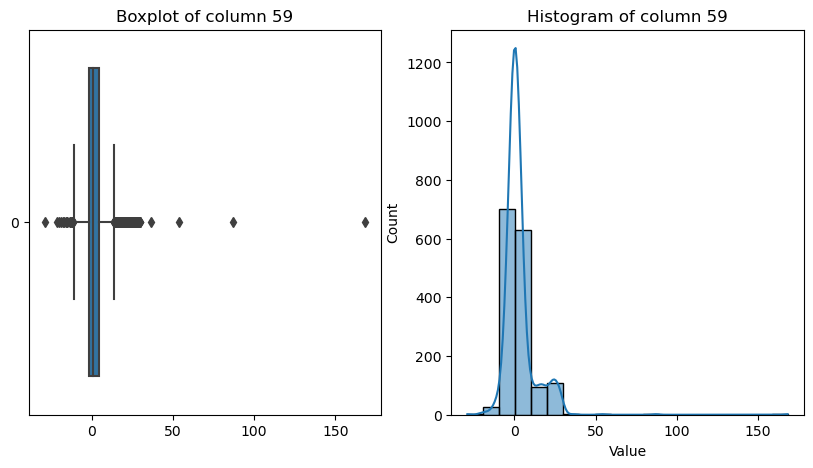

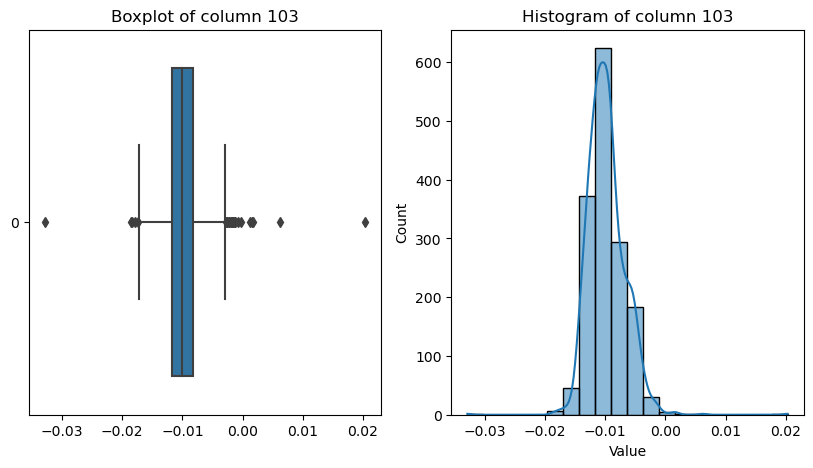

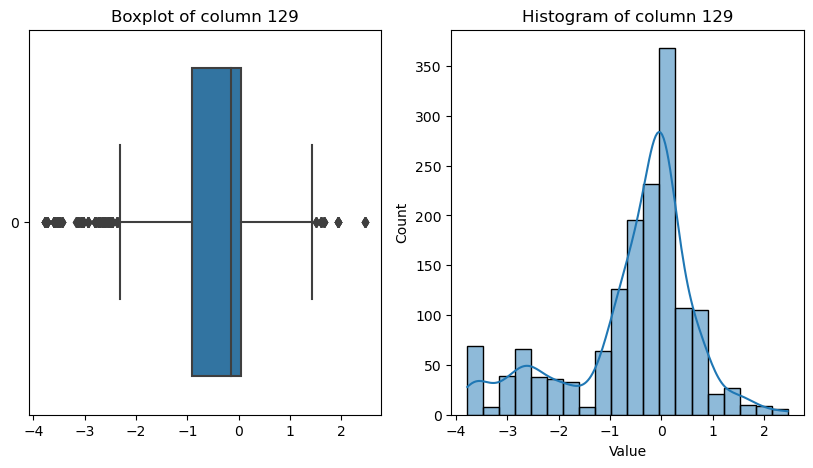

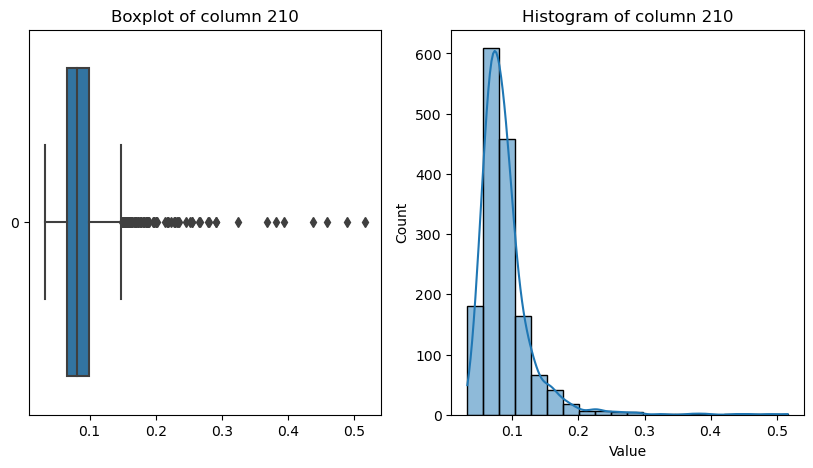

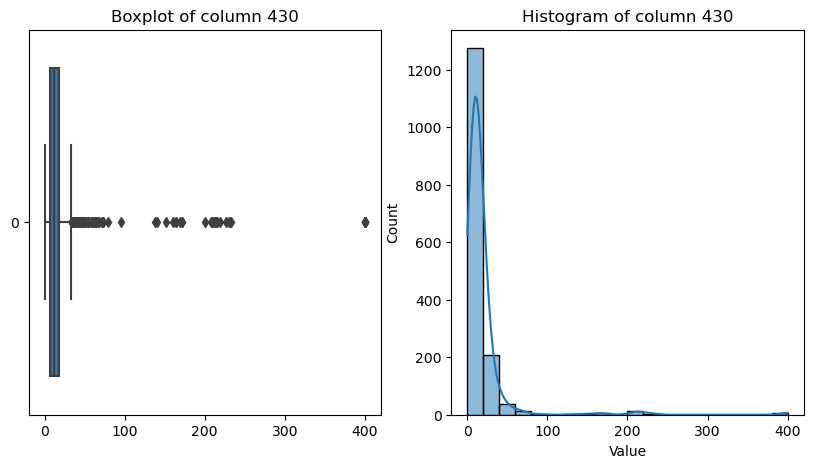

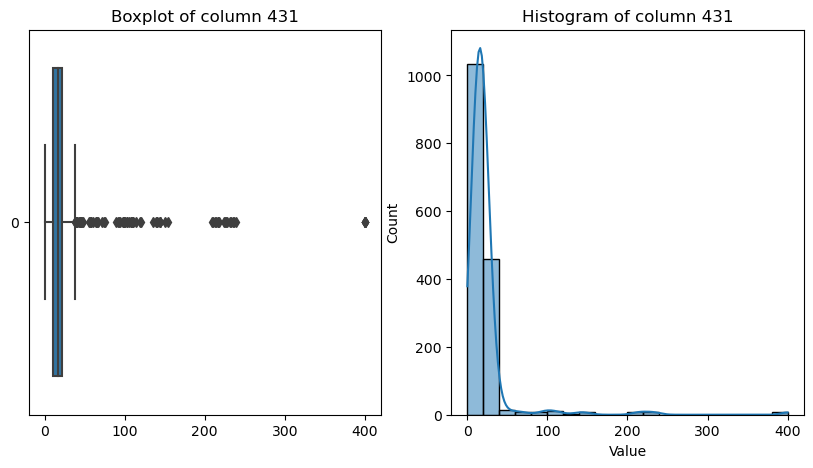

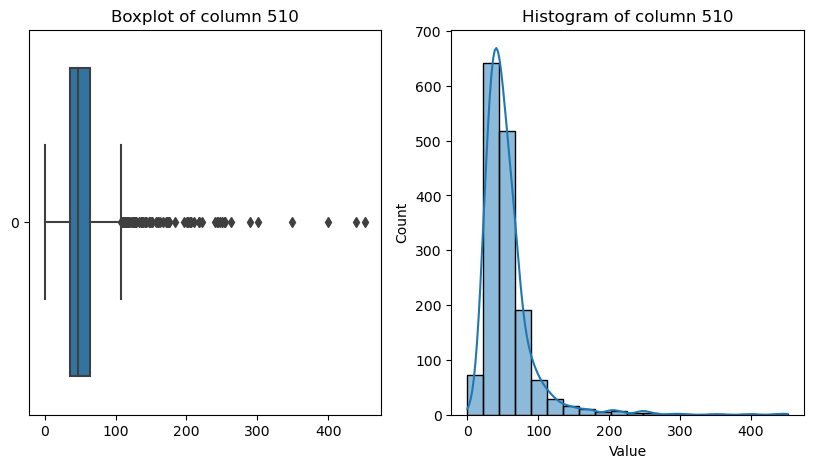

In [23]:

def plot_boxplot_and_hist(df, col_name, figsize=(10, 5)):
    fig, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True, figsize=figsize)

    # Boxplot
    sns.boxplot(df[col_name], ax=ax_box, orient='h')
    ax_box.set_title(f'Boxplot of column {col_name}')
    ax_box.set_xlabel('')

    # Histogram
    sns.histplot(df[col_name], kde=True, bins=20, edgecolor='black', ax=ax_hist)
    ax_hist.set_title(f'Histogram of column {col_name}')
    ax_hist.set_xlabel('Value')

    plt.show()
    
    
num_df = df.iloc[:,:-1]
colums_to_plot =[]
colums_to_plot = num_df.columns



for col in colums_to_plot:
    plot_boxplot_and_hist(df, col)    


Analysis :
----------------------

Column 21:
------------

**Boxplot**:


1. The data is heavily skewed to the left.
2. There are numerous outliers on both the lower and higher ends of the scale, with a more significant                concentration of outliers on the lower end.
3. The interquartile range (IQR) is quite narrow, suggesting that most of the data points are close to each other.

**Histogram**:


1. The histogram shows a bimodal distribution, with two prominent peaks.
2. The distribution is right-skewed, indicating that most data points are clustered towards the lower values, with    fewer data points stretching towards the higher values.
3. There are significant outliers, as seen from the long tail on the right side of the histogram.


Column 28:
--------------

**Boxplot**:

1. The data is moderately skewed to the left.
2. There are several outliers on both ends of the scale, with a higher concentration on the lower end.
3. The interquartile range (IQR) is relatively narrow, indicating that most data points are close to each other.

**Histogram**:

1. The histogram shows a right-skewed distribution.
2. Most of the data points are clustered towards the lower values, with a tail extending towards the higher values.
3. The presence of outliers is evident from the extended tail on the right side of the histogram.


Column 59:
--------------

**Boxplot**:

1. The data is havily skewed to the left.
2. There are several outliers on both ends of the scale, with a higher concentration on the lower end.
3. The interquartile range (IQR) is very narrow, indicating that most data points are close to each other.

**Histogram**:

1. The histogram shows a right-skewed distribution.
2. Most of the data points are clustered towards the lower values, with a tail extending towards the higher values.
3. The presence of outliers is evident from the extended tail on the right side of the histogram.

Column 103:
--------------

**Boxplot**:

1. The data is havily skewed to the both side.
2. There are several outliers on both ends of the scale, with a higher concentration on the lower end.
3. The interquartile range (IQR) is very narrow, indicating that most data points are close to each other.

**Histogram**:

1. The histogram shows no skewness in distribution.
2. Most of the data points are clustered towards the lower values, with a tail extending towards the higher values.


Column 129:
--------------

**Boxplot**:

1. The data is havily skewed to the righr.
2. There are several outliers on both ends of the scale, with a higher concentration on the lower end.
3. The interquartile range (IQR) is very narrow, indicating that most data points are close to each other.

**Histogram**:

1. The histogram shows a left-skewed distribution.
2. Most of the data points are clustered towards the lower values, with a tail extending towards the higher values.
3. The presence of outliers is evident from the extended tail on the left side of the histogram.


& rest of the column having the similar observation as column '59'.



## B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

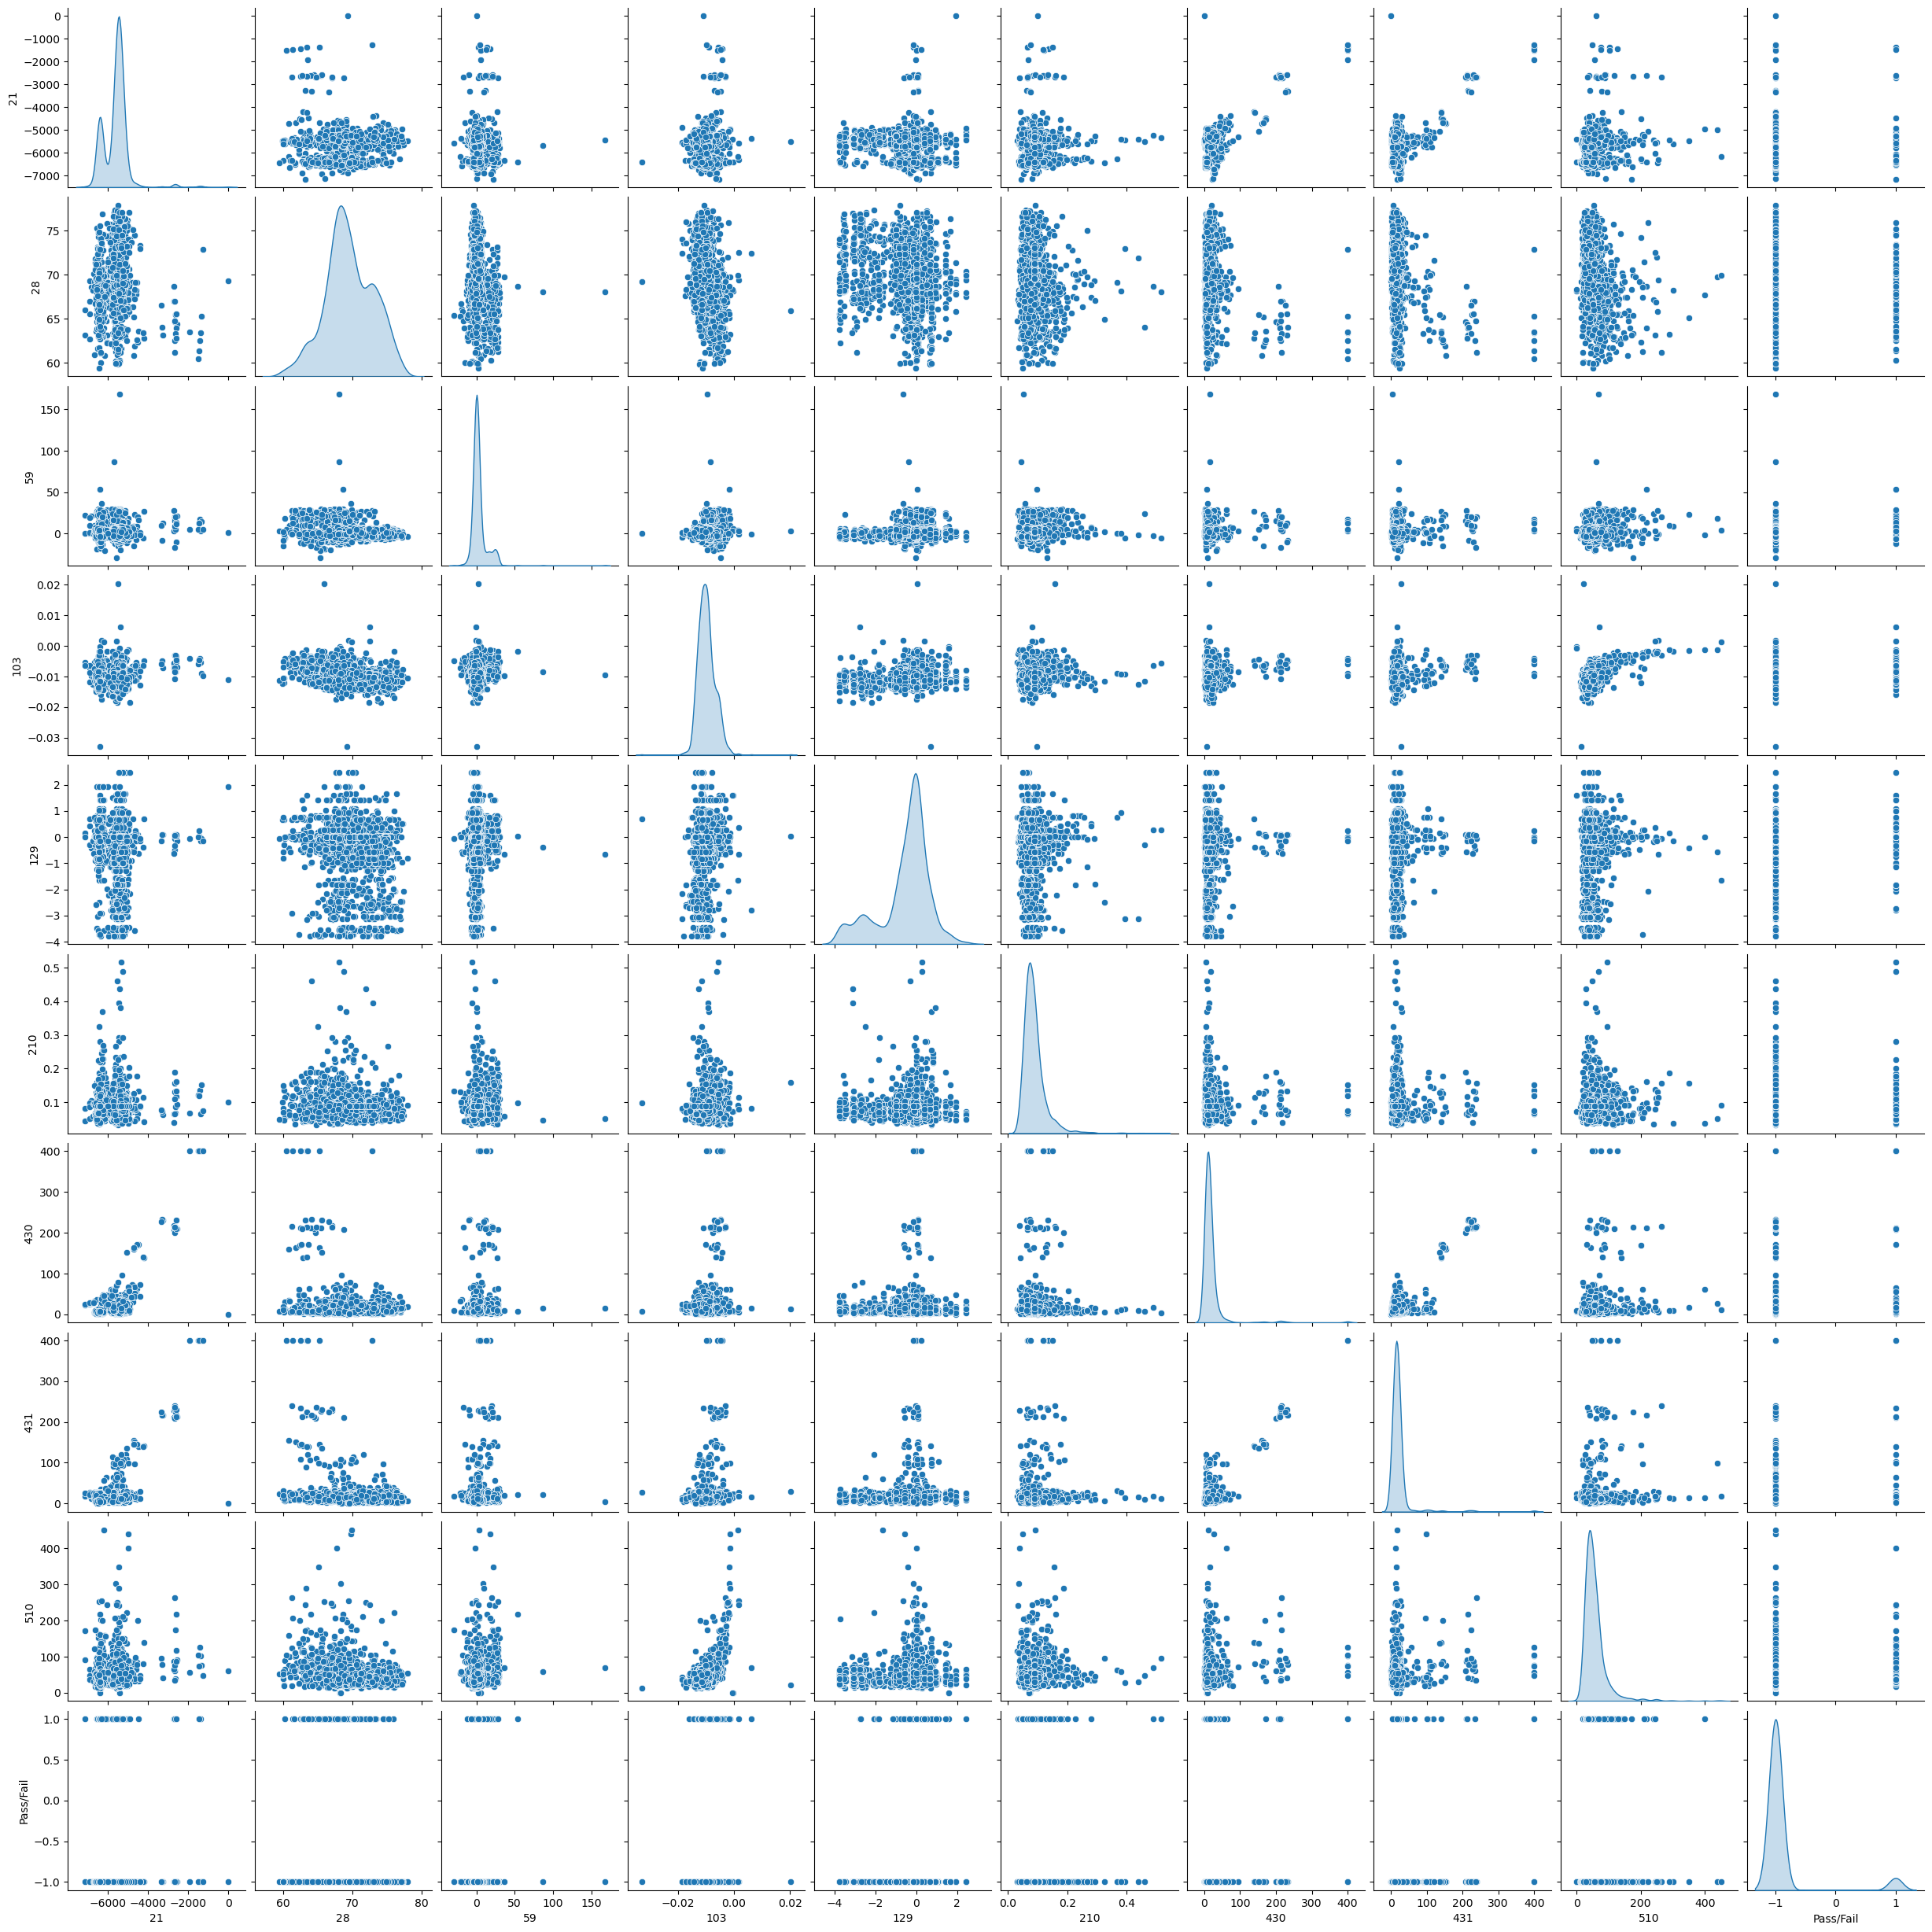

In [24]:
sns.pairplot(df, diag_kind='kde')

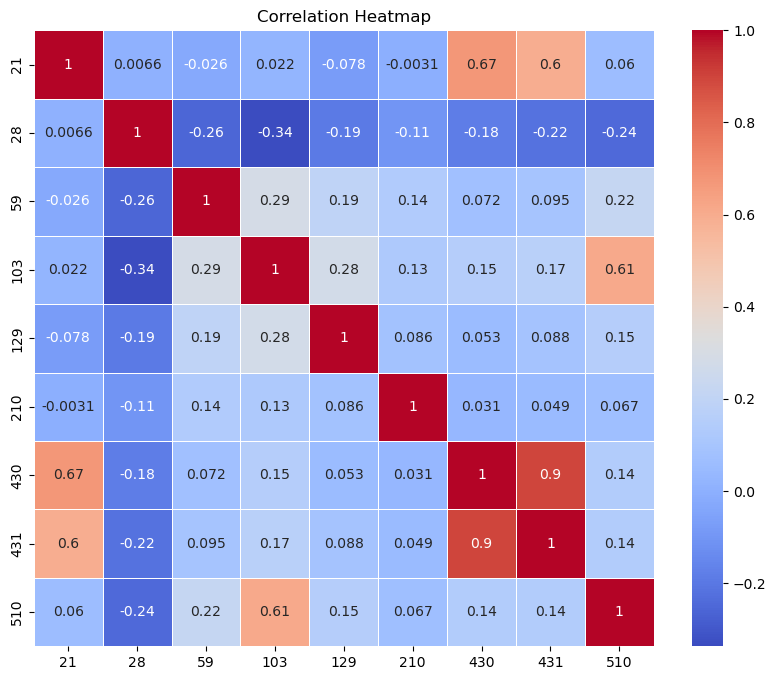

In [25]:
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df.drop(columns='430' , inplace=True)
df.shape

(1567, 9)

In [27]:
df.shape

(1567, 9)

## A. Segregate predictors vs target attributes. [2 Marks]

In [28]:
df['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [29]:
df['Pass/Fail'] = df['Pass/Fail'].map({-1 : 1, 1 : 0} )


In [30]:
X=df.drop(columns='Pass/Fail')
y=df['Pass/Fail']

## 4. B. Check for target balancing and fix it if found imbalanced. [3 Marks]

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [33]:
X_res.shape, y_res.shape

((2926, 8), (2926,))

In [34]:
y_res.value_counts()

Pass/Fail
1    1463
0    1463
Name: count, dtype: int64

## Q4 C - Perform train-test split and standardize the data or vice versa if required.

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, LeaveOneOut

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res , test_size=0.4, random_state=75, stratify=y_res)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_res_scaled = scaler.transform(X_test_res)

## Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [38]:
X_train_res_scaled = pd.DataFrame(X_train_res_scaled, columns=X.columns)
X_test_res_scaled = pd.DataFrame(X_test_res_scaled, columns=X.columns)

In [39]:
print("Training Data Statistics:")
X_train_res_scaled.describe(include='all').T.round(2)

Training Data Statistics:


,count,mean,std,min,25%,50%,75%,max
21,1755.0,0.0,1.0,-2.11,-0.32,0.05,0.26,5.32
28,1755.0,-0.0,1.0,-2.79,-0.60,-0.09,0.60,2.87
59,1755.0,-0.0,1.0,-2.74,-0.62,-0.25,0.42,16.56
103,1755.0,0.0,1.0,-2.96,-0.71,-0.09,0.63,9.16
129,1755.0,0.0,1.0,-3.40,-0.24,0.24,0.52,2.76
210,1755.0,-0.0,1.0,-1.29,-0.54,-0.25,0.27,8.11
431,1755.0,0.0,1.0,-0.52,-0.30,-0.21,-0.13,6.90
510,1755.0,0.0,1.0,-1.51,-0.58,-0.28,0.22,9.35


In [40]:
print("Testing Data Statistics:")
X_test_res_scaled.describe(include='all').T.round(2)

Testing Data Statistics:


,count,mean,std,min,25%,50%,75%,max
21,1171.0,0.06,1.09,-2.06,-0.25,0.04,0.26,7.08
28,1171.0,0.06,1.00,-2.97,-0.51,0.01,0.67,2.62
59,1171.0,-0.04,0.92,-3.53,-0.63,-0.29,0.40,8.29
103,1171.0,-0.02,0.96,-7.47,-0.66,-0.09,0.59,4.68
129,1171.0,-0.02,1.03,-3.40,-0.27,0.25,0.49,2.76
210,1171.0,-0.06,0.89,-1.21,-0.57,-0.28,0.17,6.99
431,1171.0,0.02,1.14,-0.54,-0.31,-0.22,-0.13,6.90
510,1171.0,-0.03,0.96,-1.51,-0.60,-0.29,0.17,7.44


In [41]:
print("Original Data Statistics:")
X.describe(include='all').T.round(2)

Original Data Statistics:


,count,mean,std,min,25%,50%,75%,max
21,1567.0,-5618.39,626.42,-7150.25,-5932.62,-5523.25,-5356.62,0.00
28,1567.0,69.50,3.46,59.40,67.38,69.16,72.26,77.90
59,1567.0,2.96,9.51,-28.99,-1.86,0.97,4.34,168.15
103,1567.0,-0.01,0.00,-0.03,-0.01,-0.01,-0.01,0.02
129,1567.0,-0.55,1.22,-3.78,-0.90,-0.14,0.05,2.46
210,1567.0,0.09,0.04,0.03,0.07,0.08,0.10,0.52
431,1567.0,22.36,36.37,0.00,11.07,16.38,21.83,400.00
510,1567.0,55.76,37.67,0.00,35.32,47.06,64.23,451.49


## 5.A. Use any Supervised Learning technique to train a model. [

In [77]:
df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


models=[]


# Create and fit the Random Forest model
rf = RandomForestClassifier( random_state=42)
rf.fit(X_train_res_scaled, y_train_res)

models.append(rf)

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_res_scaled, y_train_res)

models.append(dt)

In [80]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=100, learning_rate=0.3, depth=6, verbose=0)

# Train the model
cb.fit(X_train_res_scaled, y_train_res)


models.append(cb)

Model name : RandomForestClassifier(random_state=42) 

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Training Dataset 

Accuracy Score: 1.0 

Confusion Matrix:
 [[877   0]
 [  0 878]]


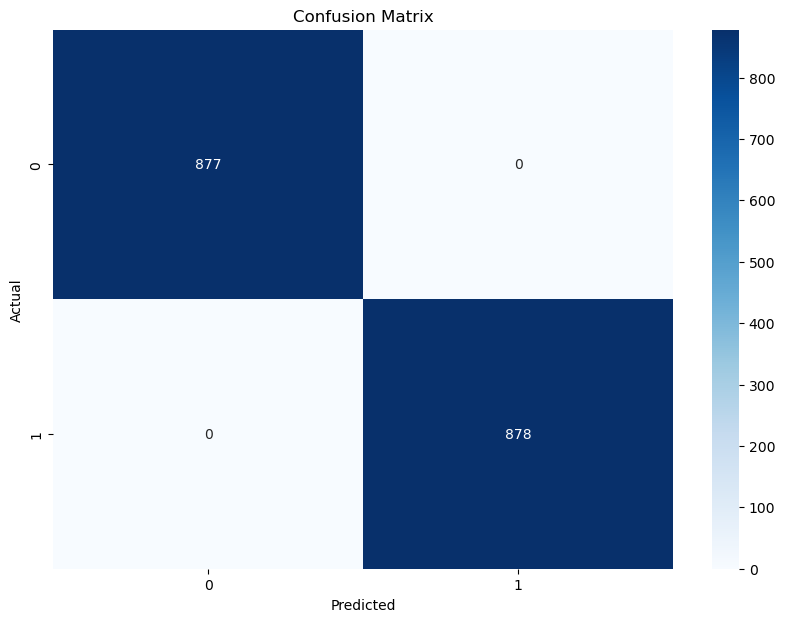

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Testing Dataset
Accuracy Score: 0.91 

Confusion Matrix:
 [[546  40]
 [ 66 519]]


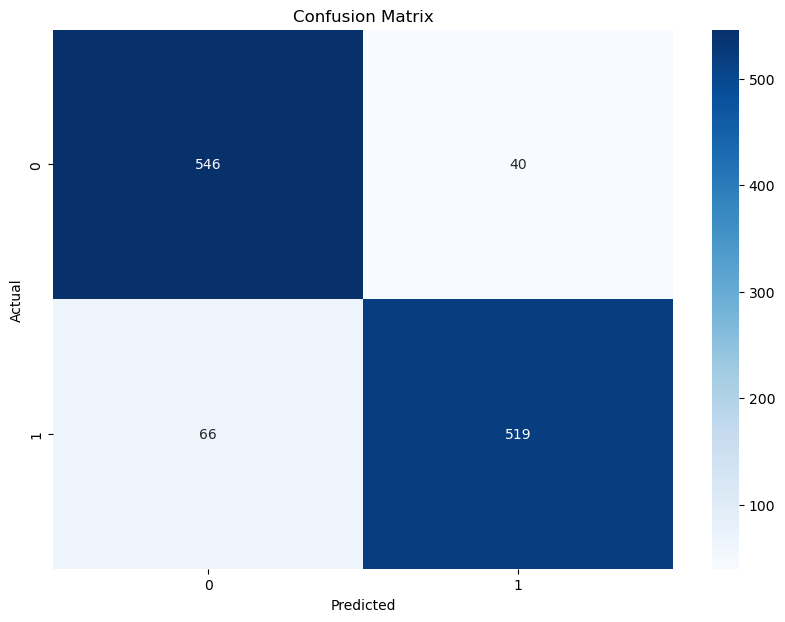

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       586
           1       0.93      0.89      0.91       585

    accuracy                           0.91      1171
   macro avg       0.91      0.91      0.91      1171
weighted avg       0.91      0.91      0.91      1171

********************************************************************** 

Model name : DecisionTreeClassifier() 

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Training Dataset 

Accuracy Score: 1.0 

Confusion Matrix:
 [[877   0]
 [  0 878]]


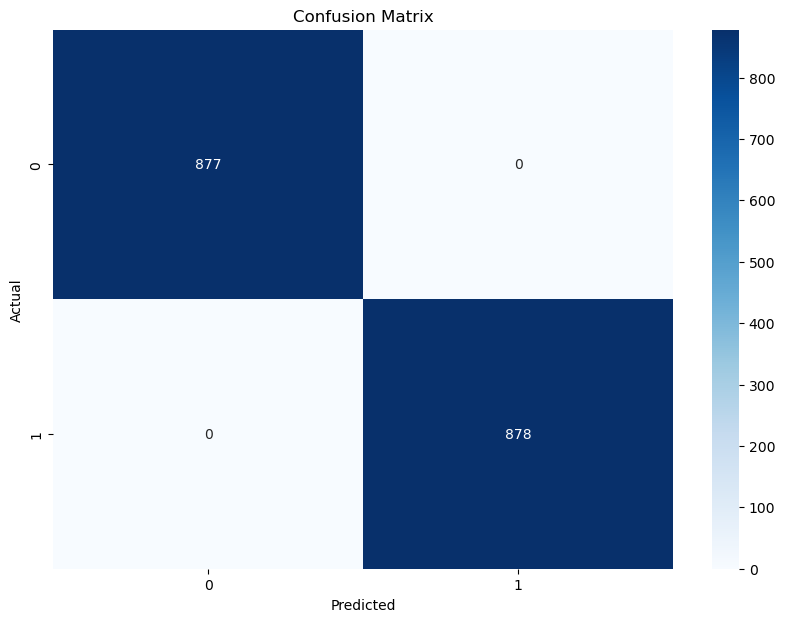

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Testing Dataset
Accuracy Score: 0.83 

Confusion Matrix:
 [[500  86]
 [113 472]]


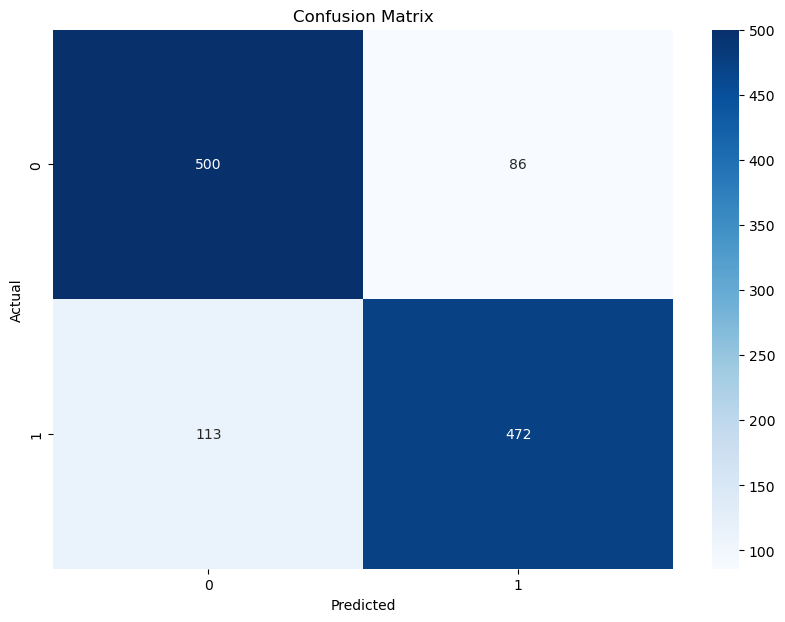

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       586
           1       0.85      0.81      0.83       585

    accuracy                           0.83      1171
   macro avg       0.83      0.83      0.83      1171
weighted avg       0.83      0.83      0.83      1171

********************************************************************** 

Model name : <catboost.core.CatBoostClassifier object at 0x14e3ecdd0> 

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Training Dataset 

Accuracy Score: 0.98 

Confusion Matrix:
 [[868   9]
 [ 22 856]]


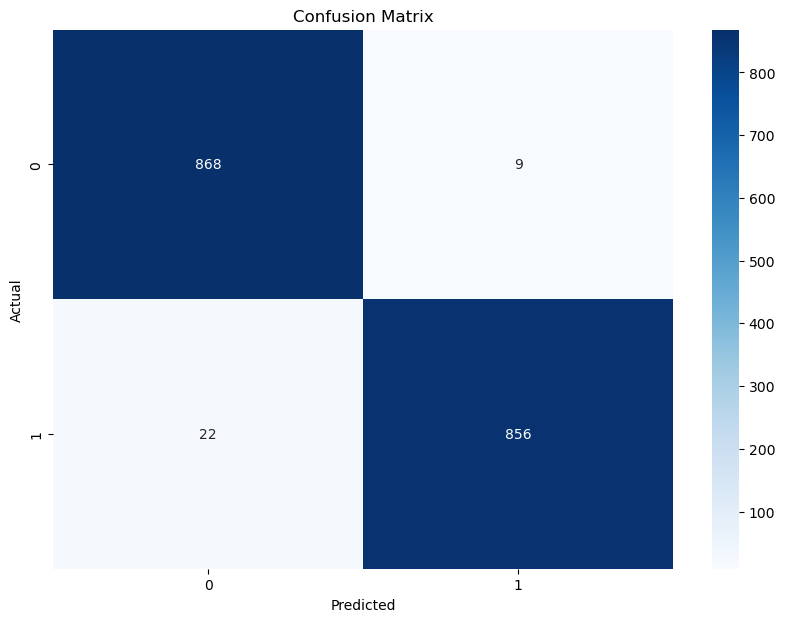

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       877
           1       0.99      0.97      0.98       878

    accuracy                           0.98      1755
   macro avg       0.98      0.98      0.98      1755
weighted avg       0.98      0.98      0.98      1755

---------------------------------------------------------------------- 

Classification Matrix & Confusion Matrix for Testing Dataset
Accuracy Score: 0.91 

Confusion Matrix:
 [[556  30]
 [ 80 505]]


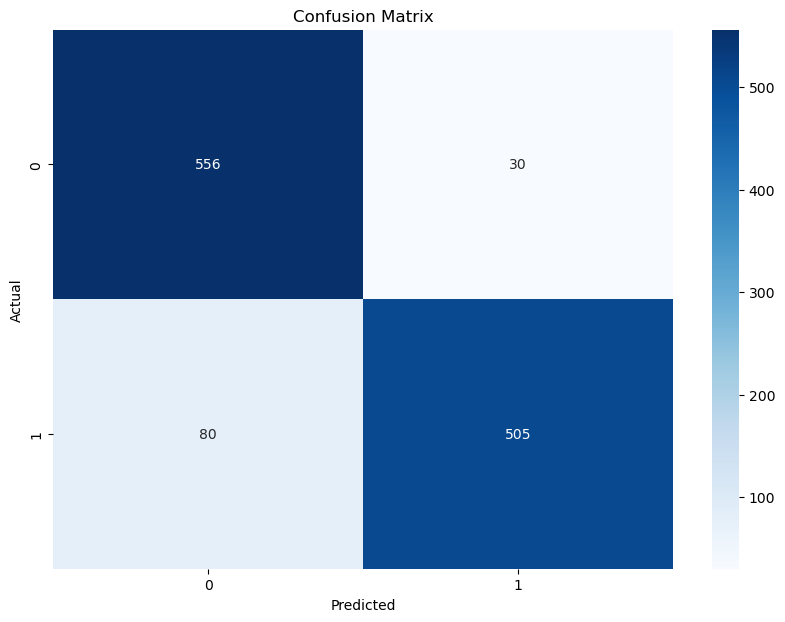

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       586
           1       0.94      0.86      0.90       585

    accuracy                           0.91      1171
   macro avg       0.91      0.91      0.91      1171
weighted avg       0.91      0.91      0.91      1171

********************************************************************** 



In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def confusion_mat_classification_rep(model, dep_var, target_var, threshold=0.5):
    # Get the model's predictions
    y_pred_proba = model.predict(dep_var)
    
    # If predictions are probabilities, binarize them
    if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
        y_pred = y_pred_proba.argmax(axis=1)
    else:
        y_pred = (y_pred_proba > threshold).astype(int)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(target_var, y_pred)
    accuracy = accuracy_score(target_var, y_pred)
    precision = precision_score(target_var, y_pred, average='weighted')
    recall = recall_score(target_var, y_pred, average='weighted')
    f1_score_value = f1_score(target_var, y_pred, average='weighted')
    print("Accuracy Score:", round(accuracy, 2), '\n')
    print("Confusion Matrix:\n", cm)
    
    # Plot the confusion matrix (optional)
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the classification report
    print("Classification Report:\n", classification_report(target_var, y_pred))
    # Print the accuracy score
    return accuracy, precision, recall, f1_score_value

    
    
    
for model in models: 
    
    model_name = type(model).__name__

    print(f"Model name : {model} \n")
    print('-' * 70, '\n')
    print('Classification Matrix & Confusion Matrix for Training Dataset \n')
    accuracy, precision, recall, f1_score_val = confusion_mat_classification_rep(model, X_train_res_scaled, y_train_res)
    
    df_results.loc[len(df_results)] = [model_name+'_train', accuracy, precision, recall, f1_score_val]
    print('-' * 70, '\n')
    print('Classification Matrix & Confusion Matrix for Testing Dataset')
    accuracy, precision, recall, f1_score_val = confusion_mat_classification_rep(model, X_test_res_scaled, y_test_res)
    print('*' * 70, '\n')
    
    df_results.loc[len(df_results)] = [model_name+ '_test', accuracy, precision, recall, f1_score_val]
    
    
    


In [82]:
df_results.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier_train,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier_test,0.909479,0.910285,0.909479,0.909433
2,DecisionTreeClassifier_train,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier_test,0.830060,0.830757,0.830060,0.829966
4,CatBoostClassifier_train,0.982336,0.982442,0.982336,0.982335


## Q5 B - Use cross validation techniques.

#### K-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_cv_scores = cross_val_score(cb, X_train_res_scaled, y_train_res, cv=kf)

# Display the cross-validation scores
print(f"K-Fold CV Scores: {k_cv_scores}")
print(f"Mean CV Score: {k_cv_scores.mean()}")



K-Fold CV Scores: [0.84330484 0.87179487 0.88319088 0.91452991 0.89173789]
Mean CV Score: 0.8809116809116808


#### Using Cross validation 

In [52]:
# Perform cross-validation
cv_scores = cross_val_score(cb, X_train_res_scaled, y_train_res, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))



Cross-validation scores: [0.86324786 0.84900285 0.86609687 0.91168091 0.9002849 ]
Mean cross-validation score: 0.8780626780626781


#### Leave-One-Out Cross-Validation (LOOCV):

In [54]:
loo = LeaveOneOut()
loo_scores = cross_val_score(cb, X_train_res_scaled, y_train_res, cv=loo)

print("LOOCV scores:", loo_scores)
print("Mean LOOCV score:", np.mean(loo_scores))


LOOCV scores: [1. 0. 1. ... 1. 1. 1.]
Mean LOOCV score: 0.8928774928774929


#### Stratified K-Fold Cross-Validation:

In [55]:
skf = StratifiedKFold(n_splits=5)
skf_scores = cross_val_score(cb, X_train_res_scaled, y_train_res, cv=skf)

print("Stratified K-Fold scores:", skf_scores)
print("Mean Stratified K-Fold score:", np.mean(skf_scores))


Stratified K-Fold scores: [0.86324786 0.84900285 0.86609687 0.91168091 0.9002849 ]
Mean Stratified K-Fold score: 0.8780626780626781


## 5.C. Apply hyper-parameter tuning techniques to get the best accuracy. [

#### Grid search CV

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [200],
    'learning_rate': [0.1],
    'depth': [7],  # Use 'depth' instead of 'max_depth'
    'border_count': [32]
}


# param_grid = {
#     'iterations': [50, 100, 150, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [3, 4, 5, 6, 7],  # Use 'depth' instead of 'max_depth'
#     'border_count': [32, 64, 128, 255]
# }
# Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

grid_search = GridSearchCV(cb, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_res_scaled, y_train_res)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")



Best Parameters: {'border_count': 32, 'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.9105413105413106


####  Random search CV

In [90]:
# warnings.filterwarnings("ignore")
from scipy.stats import uniform, randint
warnings.simplefilter("ignore")


# param_grid = {
#    'iterations': randint(50, 200),
#     'depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.3),
#     'l2_leaf_reg': uniform(1, 10),
#     'border_count': randint(32, 255)
# }

param_grid = {
   'iterations': [193],
    'depth': [8],
    'learning_rate': [0.2],
    'l2_leaf_reg': [1.5],
    'border_count': [96]
}


# Best Parameters: {'border_count': 96, 'depth': 8, 'iterations': 193, 'l2_leaf_reg': 1.5076853103939694, 'learning_rate': 0.27598514468519797}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(cb, param_distributions=param_grid, n_iter=100, cv=loo, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_res_scaled, y_train_res)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")

CB_RS_model=random_search

Fitting 1755 folds for each of 1 candidates, totalling 1755 fits
Best Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1.5, 'iterations': 193, 'depth': 8, 'border_count': 96}
Best Cross-Validation Score: 0.9128205128205128


#### Conclusion:


It is concluded that RandomSearchCV is better technique than gridSearchCV so we are going ahead with randomSearchCV.

## 5.D. Use any other technique/method which can enhance the model performance. [4 Marks]

#### Ridge

In [58]:
from sklearn.linear_model import Ridge


# Define the model
ridge_model = Ridge()

# Define the parameter distribution
param_dist = {
    'alpha': uniform(0.1, 10)
}

# Create the RandomizedSearchCV object
random_search_ridge = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=7, verbose=1, random_state=42, n_jobs=-1)


In [59]:
random_search_ridge.fit(X_train_res_scaled, y_train_res)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=7, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16bfaba50>},
                   random_state=42, verbose=1)

Accuracy Score: 0.72 

Confusion Matrix:
 [[619 258]
 [228 650]]


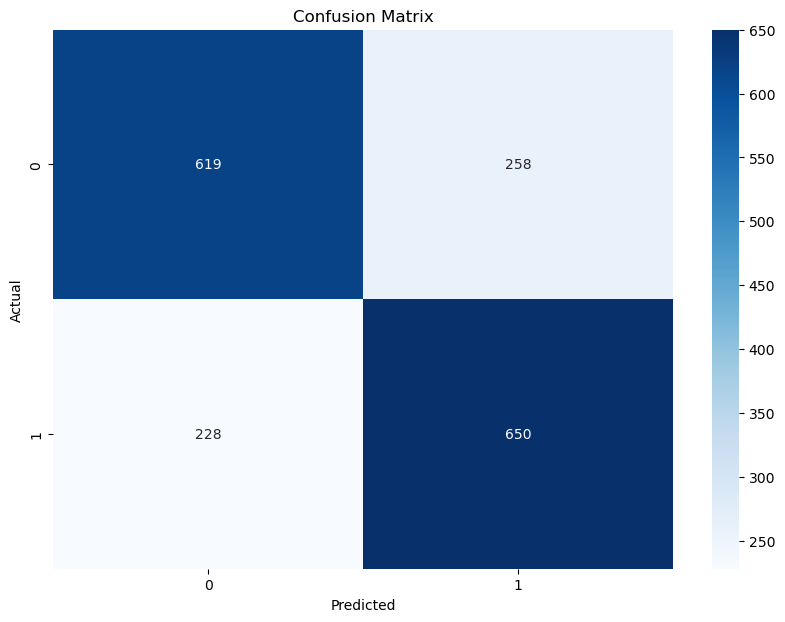

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       877
           1       0.72      0.74      0.73       878

    accuracy                           0.72      1755
   macro avg       0.72      0.72      0.72      1755
weighted avg       0.72      0.72      0.72      1755

Accuracy Score: 0.72 

Confusion Matrix:
 [[416 170]
 [158 427]]


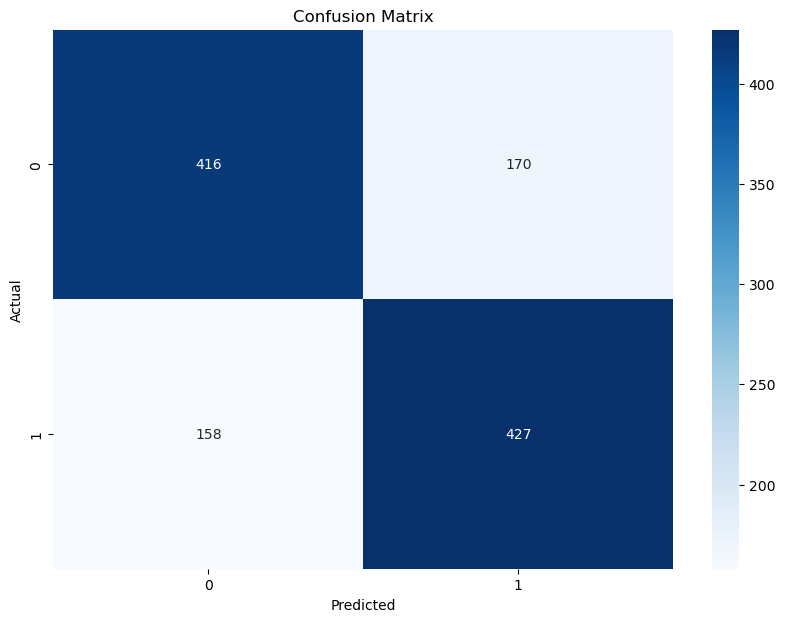

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       586
           1       0.72      0.73      0.72       585

    accuracy                           0.72      1171
   macro avg       0.72      0.72      0.72      1171
weighted avg       0.72      0.72      0.72      1171



In [60]:
accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search_ridge, X_train_res_scaled, y_train_res)

df_results.loc[len(df_results)] = ['ridge_train', accuracy, precision, recall, f1_score_val]

accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search_ridge, X_test_res_scaled, y_test_res)


df_results.loc[len(df_results)] = ['ridge_test', accuracy, precision, recall, f1_score_val]

## 5.E. Display and explain the classification report in detail. [3 Marks]

#### Classification report of Cat boost model using random search CV technique

In [62]:
from sklearn.model_selection import cross_val_predict


y_pred_cv = cross_val_predict(random_search.best_estimator_, X_train_res_scaled, y_train_res, cv=5)





Accuracy Score: 1.0 

Confusion Matrix:
 [[877   0]
 [  0 878]]


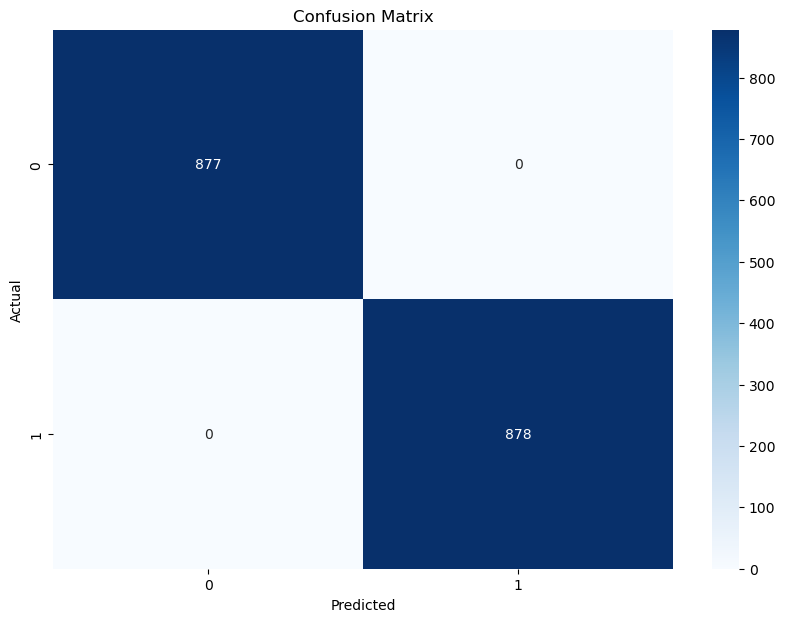

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

Accuracy Score: 0.92 

Confusion Matrix:
 [[561  25]
 [ 65 520]]


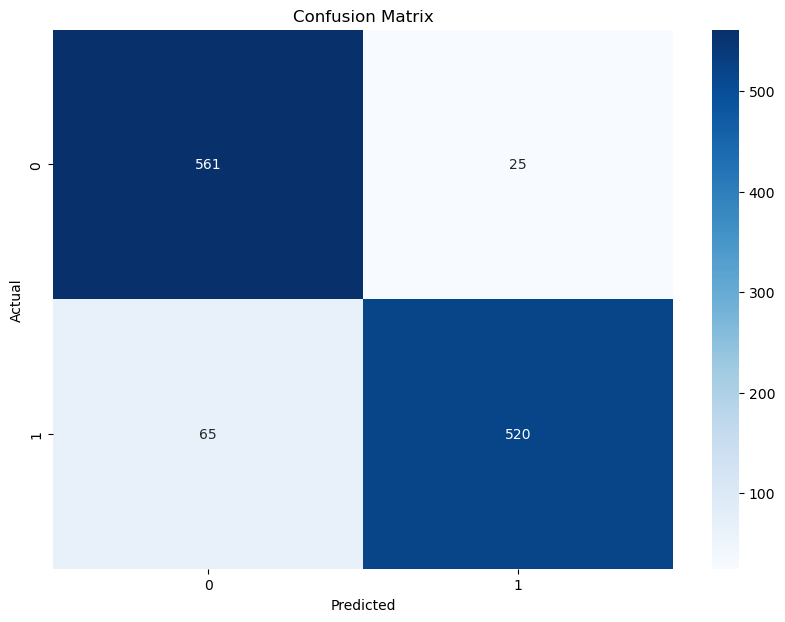

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       586
           1       0.95      0.89      0.92       585

    accuracy                           0.92      1171
   macro avg       0.93      0.92      0.92      1171
weighted avg       0.93      0.92      0.92      1171



In [63]:
accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search.best_estimator_, X_train_res_scaled, y_train_res)
df_results.loc[len(df_results)] = ['CB_RS_train', accuracy, precision, recall, f1_score_val]


cb_rs_test_accuracy = confusion_mat_classification_rep(random_search.best_estimator_, X_test_res_scaled, y_test_res)
df_results.loc[len(df_results)] = ['CB_RS_Test', accuracy, precision, recall, f1_score_val]

***Analysis and Implications***
**1. High Training Accuracy:**
 The model achieved a perfect accuracy of 100% on the training data, suggesting it has learned the training data exceptionally well. However, this also indicates potential overfitting, where the model may not generalize as effectively to new, unseen data.

**2.Strong Testing Performance:**

 The test set accuracy of approximately 92.5% indicates that the model performs well on unseen data. This high accuracy is supported by high precision, recall, and F1-scores for both classes.
Class 0 Performance:

**Precision**: 86% (percentage of correctly predicted class 0 instances out of all instances predicted as class 0)
Recall: 95% (percentage of actual class 0 instances correctly identified)
The model is more effective at identifying class 0 instances, as indicated by the higher recall.
Class 1 Performance:

**Precision**: 94% (percentage of correctly predicted class 1 instances out of all instances predicted as class 1)
Recall: 84% (percentage of actual class 1 instances correctly identified)
The model has a slightly lower recall for class 1, indicating some misclassification of class 1 instances as class 0.


**Balanced Performance:**

The macro and weighted averages of precision, recall, and F1-scores are all around 90%, suggesting balanced performance across both classes.


## 5.F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

#### Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

# Example of fitting the model
lr.fit(X_train_res_scaled, y_train_res)

LogisticRegression()

#### SVM

In [66]:
from sklearn.svm import SVC


svc = SVC()

# Example of fitting the model
svc.fit(X_train_res_scaled, y_train_res)

SVC()

#### Random Forest

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
Best Cross-Validation Score: 0.9019943019943021
Accuracy Score: 1.0 

Confusion Matrix:
 [[877   0]
 [  0 878]]


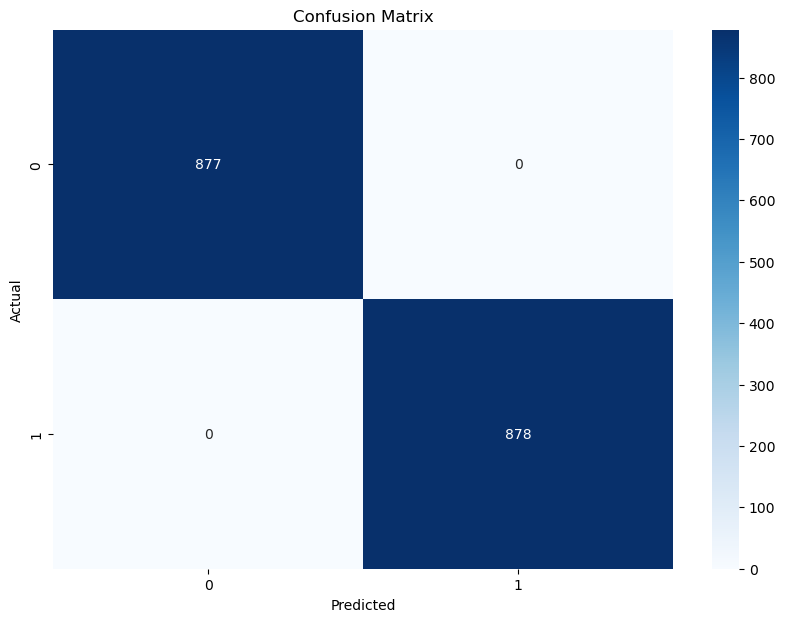

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

Accuracy Score: 0.92 

Confusion Matrix:
 [[549  37]
 [ 56 529]]


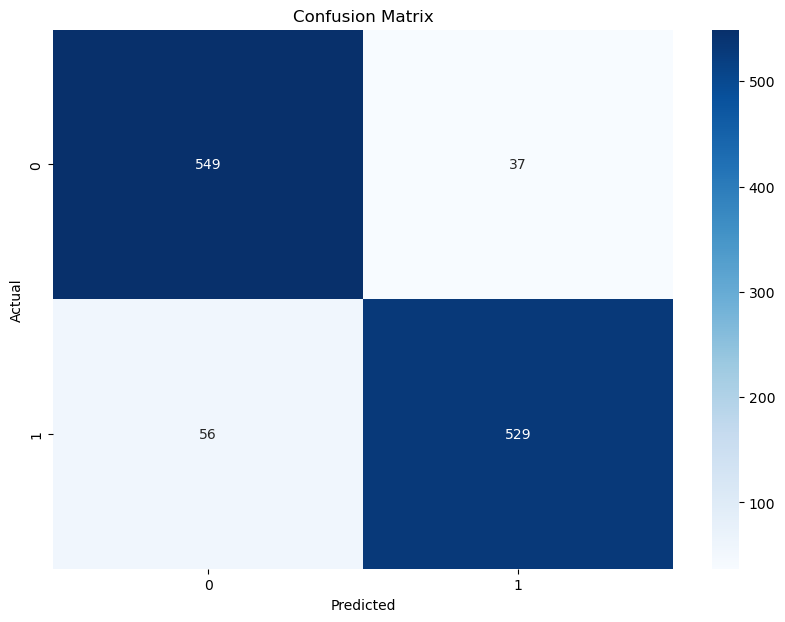

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       586
           1       0.93      0.90      0.92       585

    accuracy                           0.92      1171
   macro avg       0.92      0.92      0.92      1171
weighted avg       0.92      0.92      0.92      1171



In [67]:
# warnings.filterwarnings("ignore")
from scipy.stats import uniform, randint
warnings.simplefilter("ignore")


# param_grid = {
#     'n_estimators': np.arange(50, 200, step=50),
#     'max_depth': [None] + list(np.arange(10, 50, step=10)),
#     'min_samples_split': np.arange(2, 11, step=1),
#     'min_samples_leaf': np.arange(1, 11, step=1),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'bootstrap': [ False]
}


# Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,  # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
# Fit the model
random_search.fit(X_train_res_scaled, y_train_res)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")
accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search.best_estimator_, X_train_res_scaled, y_train_res)

df_results.loc[len(df_results)] = ['rf_RS_train', accuracy, precision, recall, f1_score_val]



accuracy, precision, recall, f1_score_val=confusion_mat_classification_rep(random_search.best_estimator_, X_test_res_scaled, y_test_res)

df_results.loc[len(df_results)] = ['rf_RS_Test', accuracy, precision, recall, f1_score_val]

#### Decision tree

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy'}
Best Cross-Validation Score: 0.7760683760683762
Accuracy Score: 0.92 

Confusion Matrix:
 [[827  50]
 [ 88 790]]


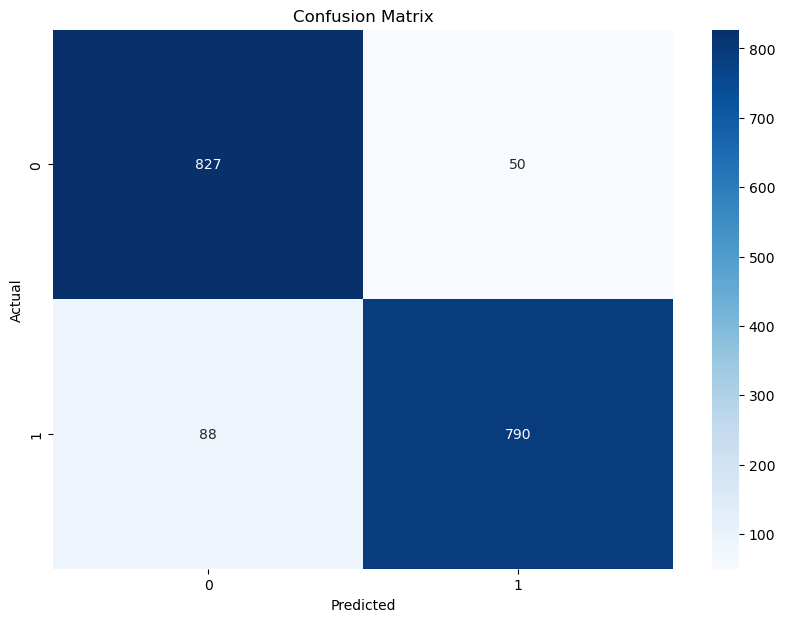

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       877
           1       0.94      0.90      0.92       878

    accuracy                           0.92      1755
   macro avg       0.92      0.92      0.92      1755
weighted avg       0.92      0.92      0.92      1755

Accuracy Score: 0.81 

Confusion Matrix:
 [[490  96]
 [121 464]]


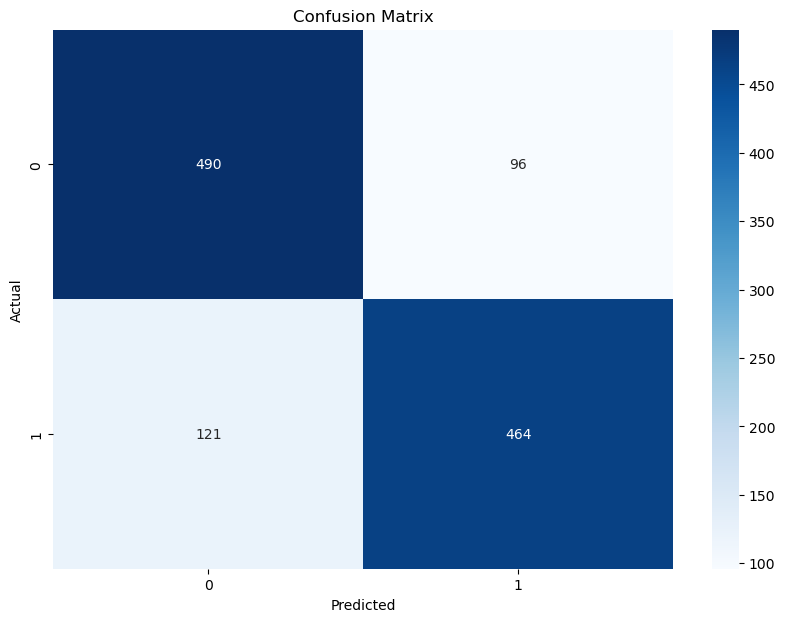

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       586
           1       0.83      0.79      0.81       585

    accuracy                           0.81      1171
   macro avg       0.82      0.81      0.81      1171
weighted avg       0.82      0.81      0.81      1171



In [68]:
# warnings.filterwarnings("ignore")
from scipy.stats import uniform, randint
warnings.simplefilter("ignore")


# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': np.arange(1, 50, step=1),
#     'min_samples_split': np.arange(2, 20, step=1),
#     'min_samples_leaf': np.arange(1, 20, step=1),
#     'max_features': [None, 'auto', 'sqrt', 'log2'],
#     'max_leaf_nodes': [None] + list(np.arange(10, 100, step=10))
# }

param_grid = {
    'criterion': [ 'entropy'],
    'splitter': ['best'],
    'max_depth': [40],
    'min_samples_split': [6],
    'min_samples_leaf': [6],
    'max_features': ['log2'],
    'max_leaf_nodes': [None]
}


# Best Parameters: {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy'}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,  # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
# Fit the model
random_search.fit(X_train_res_scaled, y_train_res)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")
accuracy, precision, recall, f1_score_val=confusion_mat_classification_rep(random_search.best_estimator_, X_train_res_scaled, y_train_res)

df_results.loc[len(df_results)] = ['dt_RS_Test', accuracy, precision, recall, f1_score_val]
accuracy, precision, recall, f1_score_val=confusion_mat_classification_rep(random_search.best_estimator_, X_test_res_scaled, y_test_res)
df_results.loc[len(df_results)] = ['dt_RS_Test', accuracy, precision, recall, f1_score_val]

#### logistic regression

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users

/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/B0297340/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/B

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'l1_ratio': 0.2222222222222222, 'C': 0.08858667904100823}
Best Cross-Validation Score: 0.7321937321937322
Accuracy Score: 0.74 

Confusion Matrix:
 [[624 253]
 [206 672]]


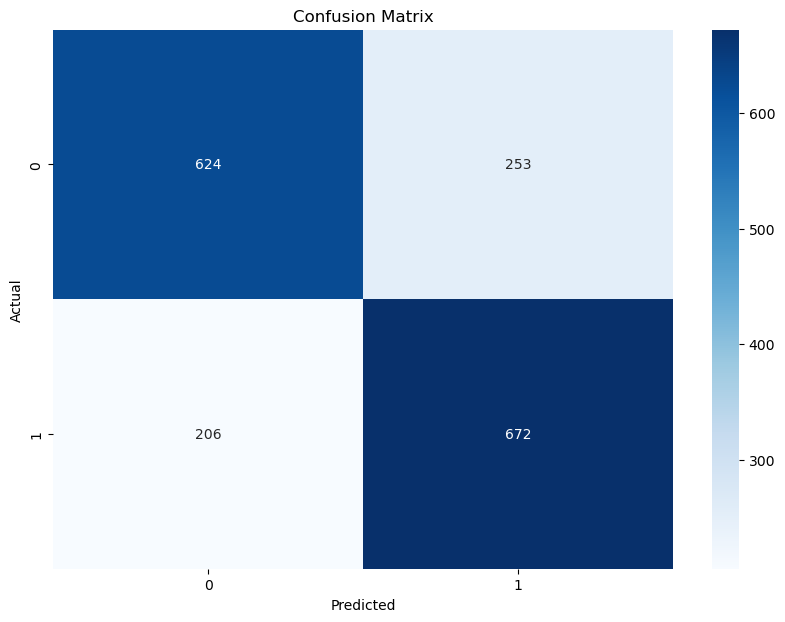

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       877
           1       0.73      0.77      0.75       878

    accuracy                           0.74      1755
   macro avg       0.74      0.74      0.74      1755
weighted avg       0.74      0.74      0.74      1755

Accuracy Score: 0.73 

Confusion Matrix:
 [[418 168]
 [149 436]]


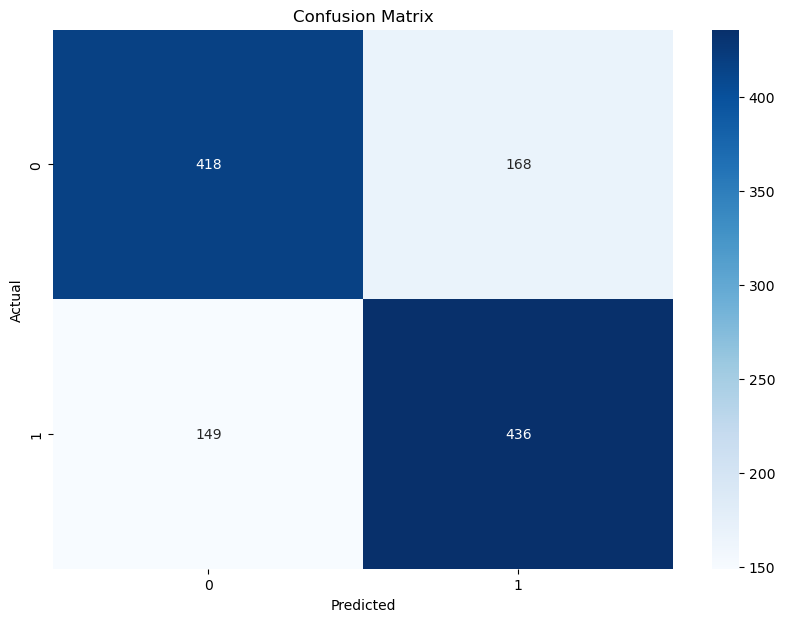

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       586
           1       0.72      0.75      0.73       585

    accuracy                           0.73      1171
   macro avg       0.73      0.73      0.73      1171
weighted avg       0.73      0.73      0.73      1171



In [84]:
# warnings.filterwarnings("ignore")
from scipy.stats import uniform, randint
warnings.simplefilter("ignore")


# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization term
#     'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
#     'max_iter': np.arange(100, 1100, 100),  # Maximum number of iterations to converge
#     'l1_ratio': np.linspace(0, 1, 10)  # Elastic-Net mixing parameter, only used if penalty is 'elasticnet'
# }
param_grid = {
    'penalty': ['l2'],  # Regularization term
    'C': [0.08858667904100823],  # Inverse of regularization strength
    'solver': [ 'liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [600],  # Maximum number of iterations to converge
    'l1_ratio': [0.2222222222222222]  # Elastic-Net mixing parameter, only used if penalty is 'elasticnet'
}


# Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'l1_ratio': 0.2222222222222222, 'C': 0.08858667904100823}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lr,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,  # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
# Fit the model
random_search.fit(X_train_res_scaled, y_train_res)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")
accuracy, precision, recall, f1_score_val=confusion_mat_classification_rep(random_search.best_estimator_, X_train_res_scaled, y_train_res)

df_results.loc[len(df_results)] = ['lr_RS_Test', accuracy, precision, recall, f1_score_val]

accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search.best_estimator_, X_test_res_scaled, y_test_res)

df_results.loc[len(df_results)] = ['lr_RS_Test', accuracy, precision, recall, f1_score_val]


#### SVM

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'tol': 0.01, 'shrinking': False, 'probability': True, 'kernel': 'rbf', 'gamma': 1.0, 'class_weight': 'balanced', 'C': 10.0}
Best Cross-Validation Score: 0.9008547008547009
Accuracy Score: 0.99 

Confusion Matrix:
 [[869   8]
 [  5 873]]


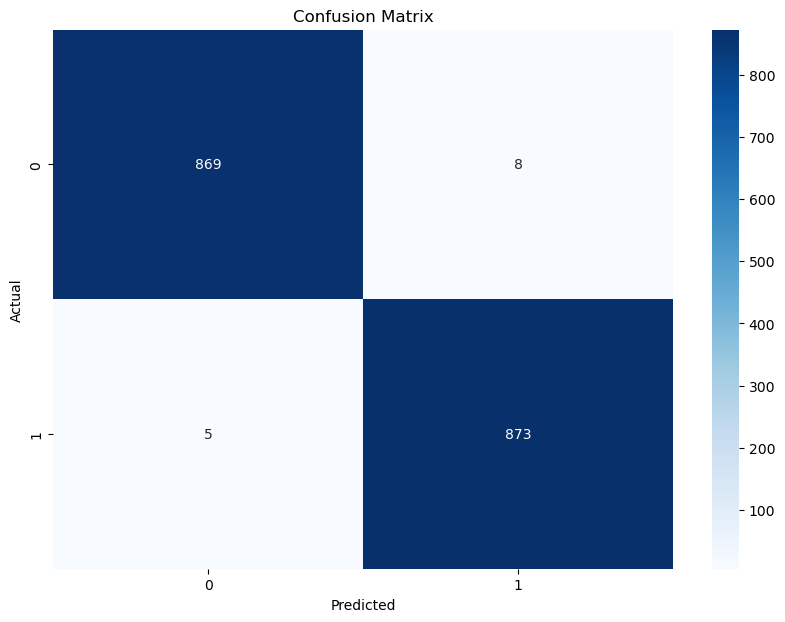

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       877
           1       0.99      0.99      0.99       878

    accuracy                           0.99      1755
   macro avg       0.99      0.99      0.99      1755
weighted avg       0.99      0.99      0.99      1755

Accuracy Score: 0.91 

Confusion Matrix:
 [[552  34]
 [ 71 514]]


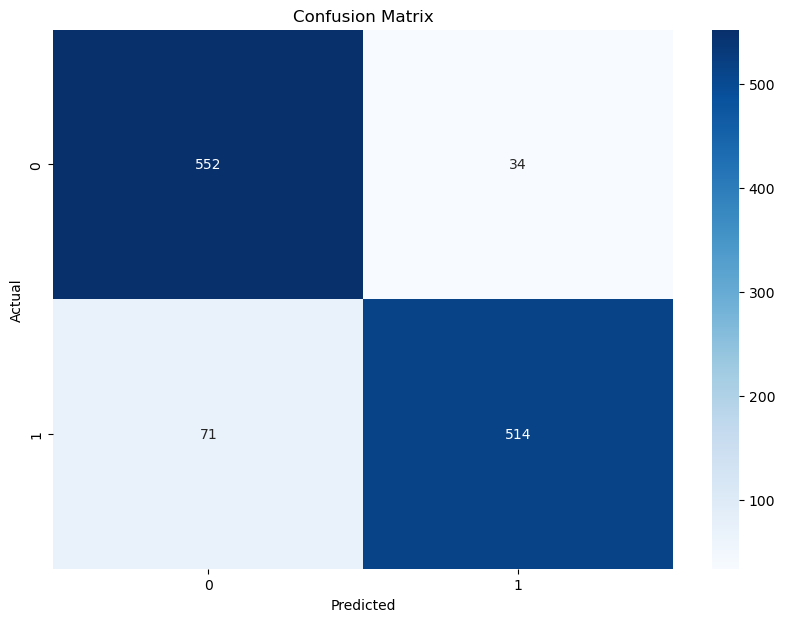

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       586
           1       0.94      0.88      0.91       585

    accuracy                           0.91      1171
   macro avg       0.91      0.91      0.91      1171
weighted avg       0.91      0.91      0.91      1171



In [85]:
# warnings.filterwarnings("ignore")
from scipy.stats import uniform, randint
warnings.simplefilter("ignore")


# param_grid = {
#     'C': np.logspace(-2, 2, 5),  # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel type
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Kernel coefficient
#     'shrinking': [True, False],  # Whether to use the shrinking heuristic
#     'probability': [True, False],  # Whether to enable probability estimates
#     'tol': np.logspace(-4, -2, 3),  # Tolerance for stopping criterion
#     'class_weight': [None, 'balanced']  # Set the parameter C of class i to class_weight[i]*C for SVC
# }

param_grid = {
    'C': [10.0],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'gamma': [1.0],  # Kernel coefficient
    'shrinking': [ False],  # Whether to use the shrinking heuristic
    'probability': [True],  # Whether to enable probability estimates
    'tol': [0.01],  # Tolerance for stopping criterion
    'class_weight': [ 'balanced']  # Set the parameter C of class i to class_weight[i]*C for SVC
}

# Best Parameters: {'tol': 0.01, 'shrinking': False, 'probability': True, 'kernel': 'rbf', 'gamma': 1.0, 'class_weight': 'balanced', 'C': 10.0}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,  # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
# Fit the model
random_search.fit(X_train_res_scaled, y_train_res)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")
accuracy, precision, recall, f1_score_val== confusion_mat_classification_rep(random_search.best_estimator_, X_train_res_scaled, y_train_res)

df_results.loc[len(df_results)] = ['svm_RS_Test', accuracy, precision, recall, f1_score_val]


accuracy, precision, recall, f1_score_val= confusion_mat_classification_rep(random_search.best_estimator_, X_test_res_scaled, y_test_res)

df_results.loc[len(df_results)] = ['svm_RS_Test', accuracy, precision, recall, f1_score_val]


## 6.A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

In [89]:
df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier_train,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier_test,0.909479,0.910285,0.909479,0.909433
2,DecisionTreeClassifier_train,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier_test,0.830060,0.830757,0.830060,0.829966
4,CatBoostClassifier_train,0.982336,0.982442,0.982336,0.982335
5,CatBoostClassifier_test,0.906063,0.909040,0.906063,0.905888
6,lr_RS_Test,0.738462,0.739140,0.738462,0.738270
7,lr_RS_Test,0.729291,0.729540,0.729291,0.729224
8,svm_RS_Test,0.729291,0.729540,0.729291,0.729224
9,svm_RS_Test,0.910333,0.911974,0.910333,0.910241


### Analysis:

**RandomForestClassifier:**

Shows perfect accuracy on the training set (1.000) but slightly lower on the test set (0.909). Precision, recall, and F1 score are consistent.

**DecisionTreeClassifier:**

Also shows perfect accuracy on the training set (1.000) but performs less well on the test set (0.830). Precision, recall, and F1 score are aligned with accuracy.

**CatBoostClassifier:**

High accuracy on both training (0.982) and test (0.906) sets, with consistent precision, recall, and F1 score.

**LogisticRegression (LR):**

Lower accuracy on the test set (0.738) compared to ensemble methods. Precision, recall, and F1 score are also lower.

**Support Vector Machine (SVM):**

High accuracy on the test set (0.910), matching CatBoost, with strong precision, recall, and F1 score.


**Conclusion:**
1. Ensemble Methods (Random Forest, CatBoost): Perform well overall with high accuracy and balanced precision, recall, and F1 scores.
2. Decision Tree: Shows overfitting with perfect training accuracy but lower test accuracy.
3. Linear Models (LR, SVM): LR shows the lowest performance in terms of accuracy and F1 score, while SVM performs     comparably well to ensemble methods.

## 6.B. Select the final best trained model along with your detailed comments for selecting this model.

#### I will select CatBoost as it has less variation between test and train accuracy and good performing model.

## 6.C. Pickle the selected model for future use.

In [ ]:
import pickle

In [91]:
model_filename = 'CB_RS_model'

# Pickle the model
with open(model_filename, 'wb') as file:
    pickle.dump(CB_RS_model, file)

print(f"Model saved as {model_filename}")

Model saved as CB_RS_model


## 6.D. Write your conclusion on the results.

The Give data was having great numbers of outliers so ensamble models were performed well on such kind of data.

eg. Random forest and Cat boost techniques.



#### CatBoostClassifier:

High accuracy on both training (0.982) and test (0.906) sets, with consistent precision, recall, and F1 score.

#### RandomForestClassifier:

Shows perfect accuracy on the training set (1.000) but slightly lower on the test set (0.909). Precision, recall, and F1 score are consistent.